In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from time import time
from tensorflow.keras.callbacks import History
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input

/home/giovanni/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/giovanni/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/giovanni/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/giovanni/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

In [2]:
# import dataset and shuffle data
df = pd.read_csv('dataset.csv')
df = df.sample(frac=1).reset_index(drop=True)
df


,1 x 1,1 x 2,1 x 3,1 x 4,1 x 5,1 x 6,1 x 7,1 x 8,1 x 9,1 x 10,...,64 x 25,64 x 26,64 x 27,64 x 28,64 x 29,64 x 30,64 x 31,64 x 32,Subject,Position
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.209911,0.000000,...,0.931965,0.516363,0.002641,0.245297,0.071289,0.015526,0.006170,0.038797,10,0
1,0.0,0.000000,0.006673,0.020170,0.027187,0.008443,0.032040,0.122499,0.117361,0.041598,...,1.466200,0.297493,0.092937,0.212335,0.563759,0.140392,0.000000,0.109871,6,0
2,0.0,0.000000,0.000000,33.646322,37.558685,32.863850,34.428795,37.558685,39.123631,50.860720,...,32.863850,34.428795,33.646322,34.428795,36.776213,34.428795,0.000000,0.000000,6,0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.461485,2.021140,0.221912,2.392884,3.197044,0.684431,0.007022,0.664366,12,2
4,0.0,0.000000,0.000000,43.967280,48.057260,42.944785,46.012270,52.147239,52.147239,57.259714,...,44.989775,43.967280,44.989775,44.989775,47.034765,53.169734,0.000000,0.000000,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0.0,0.009085,0.073201,0.337145,0.659537,0.008514,0.000000,0.042388,0.836289,3.325733,...,1.547387,2.221815,0.185385,1.669805,0.937791,1.748366,0.000000,0.018030,7,0
2668,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.059058,1.348877,0.000000,3.117234,2.930938,0.005639,0.000000,0.000000,7,1
2669,0.0,0.000000,0.000000,89.494163,80.739300,64.202335,61.284047,68.093385,70.038911,79.766537,...,42.801556,44.747082,41.828794,43.774319,42.801556,40.856031,0.000000,0.000000,0,2
2670,0.0,0.000000,0.000000,0.000000,0.000000,0.002601,0.000000,0.096642,0.002521,0.043799,...,0.638029,0.377208,0.501794,1.104796,1.082356,0.537032,0.298282,0.356913,8,0


In [3]:
# Split dataset in train, val and test
num_col = len(df.columns)
train_split = 2400
test_split = 2600

train_data = df.iloc[0:train_split, 0:num_col-2]
val_data = df.iloc[train_split:test_split, 0:num_col-2]

train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
train_position = df.iloc[0:train_split, num_col-1:num_col]
val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
val_position = df.iloc[train_split:test_split, num_col-1:num_col]

test_data = df.iloc[test_split:,:num_col-2]
test_subject = df.iloc[test_split:, num_col-2:num_col-1]
test_position = df.iloc[test_split:, num_col-1:num_col]

test_data = np.array(test_data)
test_subject = np.array(test_subject)
test_position = np.array(test_position)
test_data = test_data.reshape(len(test_data), 64,32, 1)
test_data = test_data / 500
test_subject = to_categorical(test_subject)
test_position = to_categorical(test_position)

print(test_subject.shape[1])

while test_subject.shape[1] != 13:
    df = df.sample(frac=1).reset_index(drop=True)
    train_data = df.iloc[0:train_split, 0:num_col-2]
    val_data = df.iloc[train_split:test_split, 0:num_col-2]

    train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
    train_position = df.iloc[0:train_split, num_col-1:num_col]
    val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
    val_position = df.iloc[train_split:test_split, num_col-1:num_col]

    test_data = df.iloc[test_split:,:num_col-2]
    test_subject = df.iloc[test_split:, num_col-2:num_col-1]
    test_position = df.iloc[test_split:, num_col-1:num_col]

    test_data = np.array(test_data)
    test_subject = np.array(test_subject)
    test_position = np.array(test_position)
    test_data = test_data.reshape(len(test_data), 64,32, 1)
    test_data = test_data / 500
    test_subject = to_categorical(test_subject)
    test_position = to_categorical(test_position)


13


In [4]:
# convert to numpy array
train_data = np.array(train_data)
val_data = np.array(val_data)

train_subject = np.array(train_subject)
train_position = np.array(train_position)
val_subject = np.array(val_subject)
val_position = np.array(val_position)

train_data = train_data.reshape(len(train_data), 64,32, 1)
val_data = val_data.reshape(len(val_data), 64,32, 1)

print(train_data.shape)
print(train_subject.shape)
print(train_position.shape)
print(val_data.shape)
print(val_subject.shape)
print(val_position.shape)


(2400, 64, 32, 1)
(2400, 1)
(2400, 1)
(200, 64, 32, 1)
(200, 1)
(200, 1)


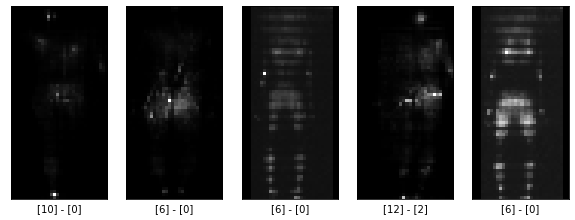

In [5]:
plt.figure(figsize=(10,5))
i = 0

for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    label = str(train_subject[i-1]) + ' - ' + str(train_position[i-1])
    plt.imshow(train_data[i-1].reshape((64, 32)), cmap='gray')
    plt.xlabel(label)
    

In [6]:
# normalize data and build categorical labels
train_data = train_data / 500
val_data = val_data / 500

train_subject = to_categorical(train_subject, 13)
train_position = to_categorical(train_position, 3)
val_subject = to_categorical(val_subject, 13)
val_position = to_categorical(val_position, 3)


In [7]:
inp = Input((64, 32, 1),)

x = Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 32, 1))(inp)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)
    
x = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.4)(x)

p = Flatten()(x)
p = Dense(120, activation='relu')(p)
p = Dense(84, activation='relu')(p)

p = Dropout(0.4)(p)

position = Dense(3, activation='softmax')(p)

s = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)
s = MaxPooling2D((2, 2))(s)
s = Dropout(0.4)(s)

s = Flatten()(s)
s = Dense(120, activation='relu')(s)
s = Dense(84, activation='relu')(s)

s = Dropout(0.4)(s)

subject = Dense(13, activation='softmax')(s)

model_subject = Model(inp, subject)
model_position = Model(inp, position)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

model_subject.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])
model_position.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])

model_subject.summary()
model_position.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 7, 16)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 7, 16)         0     

In [9]:
#train subject model
history = History()

train_subject = model_subject.fit(train_data, train_subject, validation_data = (val_data, val_subject), epochs=200,batch_size = 8, callbacks = [history])


Train on 2400 samples, validate on 200 samples
Epoch 1/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 2.5432 - acc: 0.0992 - val_loss: 2.4711 - val_acc: 0.1900
Epoch 2/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 2.4309 - acc: 0.1538 - val_loss: 2.2882 - val_acc: 0.1950
Epoch 3/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 2.2603 - acc: 0.2212 - val_loss: 2.0407 - val_acc: 0.3550
Epoch 4/200
2400/2400 [==============================] - 5s 2ms/sample - loss: 2.0717 - acc: 0.3075 - val_loss: 1.7650 - val_acc: 0.4200
Epoch 5/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 1.8716 - acc: 0.3604 - val_loss: 1.5102 - val_acc: 0.5250
Epoch 6/200
2400/2400 [==============================] - 5s 2ms/sample - loss: 1.6833 - acc: 0.4304 - val_loss: 1.3583 - val_acc: 0.6250
Epoch 7/200
2400/2400 [==============================] - 5s 2ms/sample - loss: 1.5773 - acc: 0.4712 - val_loss: 1.1076 - val_acc: 0

2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4290 - acc: 0.8517 - val_loss: 0.3957 - val_acc: 0.8650
Epoch 61/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4236 - acc: 0.8542 - val_loss: 0.3243 - val_acc: 0.8800
Epoch 62/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4305 - acc: 0.8554 - val_loss: 0.3740 - val_acc: 0.8500
Epoch 63/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4283 - acc: 0.8467 - val_loss: 0.3399 - val_acc: 0.8650
Epoch 64/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4077 - acc: 0.8600 - val_loss: 0.3379 - val_acc: 0.8800
Epoch 65/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.4187 - acc: 0.8542 - val_loss: 0.3682 - val_acc: 0.8650
Epoch 66/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3804 - acc: 0.8633 - val_loss: 0.3842 - val_acc: 0.8750
Epoch 67/200
2400/2400 [=======================

2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3405 - acc: 0.8808 - val_loss: 0.3531 - val_acc: 0.8800
Epoch 120/200
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.3257 - acc: 0.8896 - val_loss: 0.3486 - val_acc: 0.8700
Epoch 121/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2992 - acc: 0.8971 - val_loss: 0.3963 - val_acc: 0.8650
Epoch 122/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3320 - acc: 0.8908 - val_loss: 0.3366 - val_acc: 0.8700
Epoch 123/200
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.3220 - acc: 0.8933 - val_loss: 0.4013 - val_acc: 0.8550
Epoch 124/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3172 - acc: 0.8883 - val_loss: 0.4234 - val_acc: 0.8650
Epoch 125/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.3413 - acc: 0.8833 - val_loss: 0.3657 - val_acc: 0.8600
Epoch 126/200
2400/2400 [================

2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2808 - acc: 0.9054 - val_loss: 0.3318 - val_acc: 0.8700
Epoch 179/200
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.2745 - acc: 0.8971 - val_loss: 0.3587 - val_acc: 0.8650
Epoch 180/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2796 - acc: 0.9013 - val_loss: 0.3425 - val_acc: 0.8700
Epoch 181/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2680 - acc: 0.9017 - val_loss: 0.3167 - val_acc: 0.8700
Epoch 182/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2881 - acc: 0.9033 - val_loss: 0.3457 - val_acc: 0.8850
Epoch 183/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2518 - acc: 0.9121 - val_loss: 0.3525 - val_acc: 0.8700
Epoch 184/200
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2681 - acc: 0.9042 - val_loss: 0.3455 - val_acc: 0.8750
Epoch 185/200
2400/2400 [================

Text(0, 0.5, 'Accuracy')

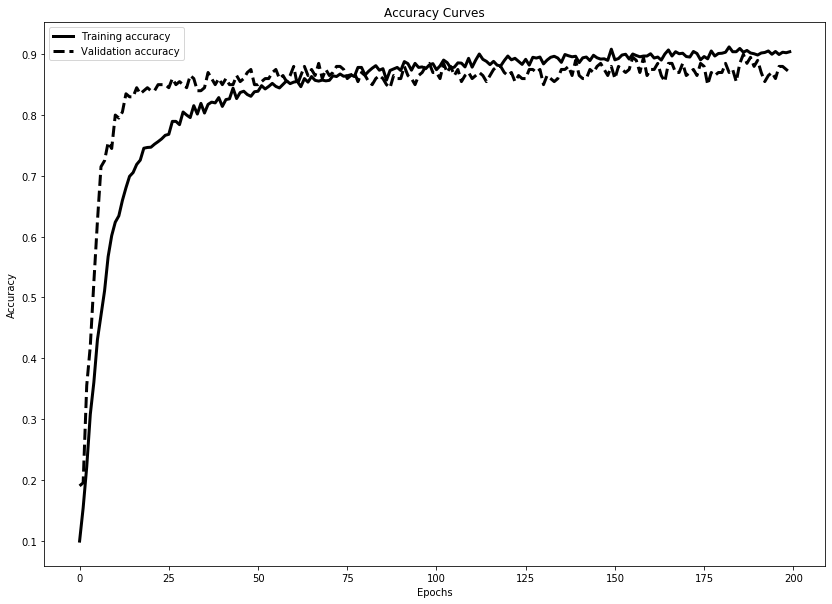

In [11]:
plt.figure(figsize = (14,10))
plt.plot(history.history['acc'],'black', linewidth = 3.0,  label = "Training accuracy")
plt.plot(history.history['val_acc'],'black', ls = "--",linewidth = 3.0, label = "Validation accuracy")
plt.legend(loc="upper left")
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


In [12]:
#train position model
history = History()

train_position = model_position.fit(train_data, train_position, validation_data = (val_data, val_position), epochs=10, callbacks = [history])


Train on 2400 samples, validate on 200 samples
Epoch 1/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.3065 - acc: 0.8904 - val_loss: 0.0674 - val_acc: 0.9750
Epoch 2/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.0883 - acc: 0.9696 - val_loss: 0.0685 - val_acc: 0.9800
Epoch 3/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.0560 - acc: 0.9792 - val_loss: 0.0434 - val_acc: 0.9850
Epoch 4/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.0460 - acc: 0.9837 - val_loss: 0.0535 - val_acc: 0.9800
Epoch 5/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.0356 - acc: 0.9871 - val_loss: 0.0326 - val_acc: 0.9900
Epoch 6/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.0249 - acc: 0.9900 - val_loss: 0.0309 - val_acc: 0.9800
Epoch 7/10
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.0272 - acc: 0.9875 - val_loss: 0.0308 - val_acc: 0.9900
E

Text(0, 0.5, 'Accuracy')

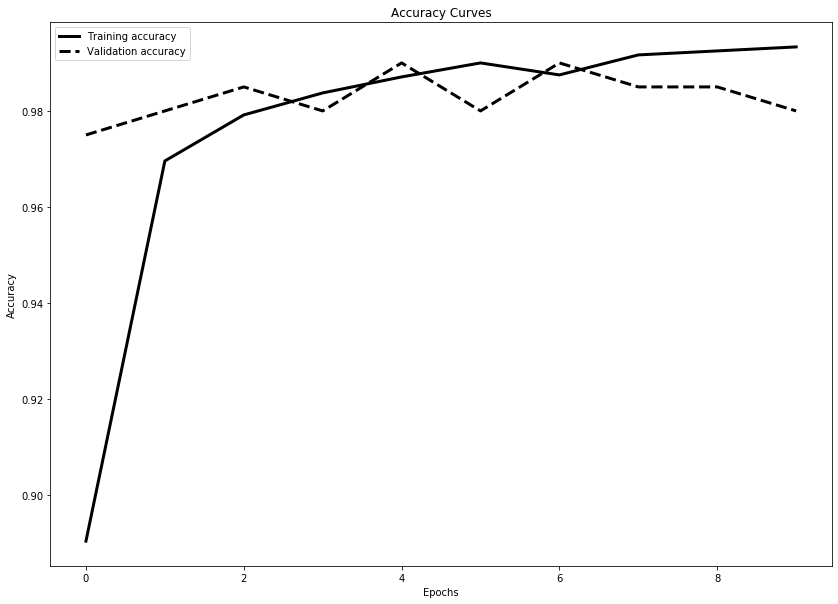

In [13]:
plt.figure(figsize = (14,10))
plt.plot(history.history['acc'],'black', linewidth = 3.0,  label = "Training accuracy")
plt.plot(history.history['val_acc'],'black', ls = "--",linewidth = 3.0, label = "Validation accuracy")
plt.legend(loc="upper left")
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


In [14]:
model_subject.evaluate(test_data, test_subject)
model_position.evaluate(test_data, test_position)


72/72 [==============================] - 0s 406us/sample - loss: 0.0155 - acc: 0.9861


[0.01551871994964434, 0.9861111]

,Subject,Position
2600,11,2
2601,4,0
2602,12,0
2603,6,0
2604,7,0
2605,6,0
2606,1,0
2607,2,2
2608,4,0
2609,7,2


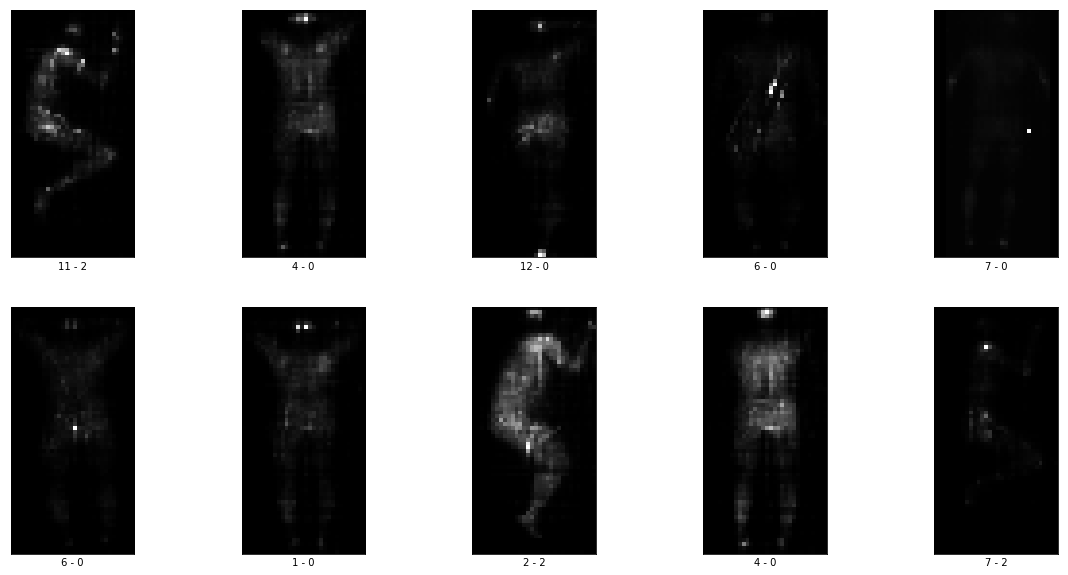

In [14]:
predictions_subject = model_subject.predict(test_data)
predictions_position = model_position.predict(test_data)

predictions_subject = predictions_subject.argmax(axis=-1)
predictions_position = predictions_position.argmax(axis=-1)

plt.figure(figsize=(20,10))

for i in range(1, 11):
    plt.subplot(2,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    label = str(predictions_subject[i-1]) + ' - ' + str(predictions_position[i-1])
    plt.imshow(test_data[i-1].reshape(64, 32), cmap='gray')
    plt.xlabel(label)

test_labels = df.iloc[test_split:, num_col-2:num_col]
test_labels.head(10)


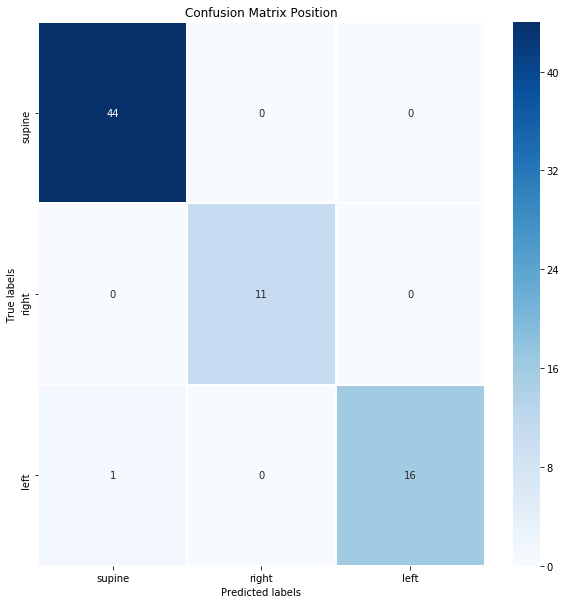

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions_subject = model_subject.predict(test_data)
predictions_position = model_position.predict(test_data)

predictions_subject = predictions_subject.argmax(axis=-1)
predictions_position = predictions_position.argmax(axis=-1)

labels = ['supine', 'right', 'left']
test_labels = df.iloc[test_split:, num_col-1:num_col]
cm = confusion_matrix(test_labels, predictions_position, [0,1,2])

f,ax= plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, ax = ax, linewidths=1, fmt = 'd', cmap = "Blues"); #annot=True to annotate cells
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Position'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


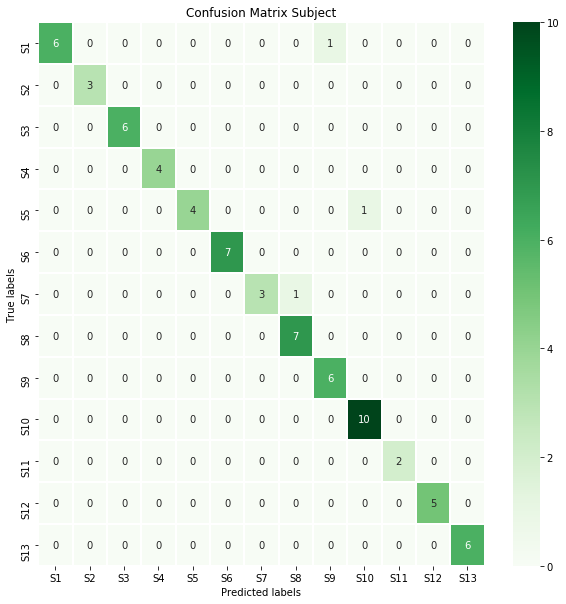

In [40]:
predictions_subject = model_subject.predict(test_data)
predictions_position = model_position.predict(test_data)

predictions_subject = predictions_subject.argmax(axis=-1)
predictions_position = predictions_position.argmax(axis=-1)

labels = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6','S7', 'S8', 'S9','S10', 'S11', 'S12','S13']
test_labels = df.iloc[test_split:, num_col-2:num_col-1]
cm = confusion_matrix(test_labels, predictions_subject, [0,1,2,3,4,5,6,7,8,9,10,11,12])

f,ax= plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, ax = ax, linewidths=1, fmt = 'd', cmap="Greens"); #annot=True to annotate cells
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Subject'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


In [15]:
#save model and architecture to single file
model_subject.save("model_subject.h5")
model_position.save("model_position.h5")

with open('test.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([test_data, test_subject, test_position], f)